## Project Overview
### Train and test a classification model(s) on the Default dataset.
Before training a model on this dataset, a good understanding of each explanatory variable (features) is vital.
### Definition of each feature

 - **limit_bal**: limit balance also known as credit limit is the **credit limit** after applying for a credit card determined by the credit card issuer.
 - **sex:** Sex of the credit card owner which is either 1 for **Male** or 2 for **Female**
 - **education:** Highest level of education for the credit card owner. where 1 = graduate school; 2 = university; 3 = high school; 4 = others
 - **marriage:** Marital status of credit card owner where 1 = married; 2 = single; 3 = others
 - **age:** Ages of card owners.
 - **pay_0 to pay_6:** History of past monthly pay records starting from April(pay_0) to September(pay_6) for each card owner.
    statuses are 0: pay duly, 1: payment delay for one month, 2: payment delay for two months.
 - **bill_amtt1 to bill_amnt6** represents amount of bill statement from April(bill_amt1) to September(bill_amt6). 
    **Bill statement** is a periodic statement that lists all the payments, purchases and other debits and credits during the billing cycle.
 - **pay_amt1 to pay_amt6** is amount paid in the previous month. From April(pay_amt1) to September(pay_amt6)
 - **defaulted:** To defauult means failure to pay a debt on the agreed upon date. IN this case, creditors mostly raise interest rates or decrese the credit limit.
        
Since defaulted is the target variable in this case, suitable models will be used to train and test the other explanatory variables and see which model predicts with highest accuracy on the dataset.


In [1]:
#importing packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
plt.rcParams["figure.figsize"] = (8,6)


In [2]:
data = pd.read_csv('defaults.csv')
data.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Performing Data cleaning and preprocessing.
At this point, cleaning is done by ensuring there are no missing values or 
wrong input values by following the dataset description and the data given. 

In [3]:
data.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


 - The inbuilt function describes gives more details for all numerical features and since all the features here are numerical, the description is given for all of them.
 - prints out the counts of all the records for each feature, mean, standard deviation, min, max and percentile values. This helps better understand the nature of the explanatory variable.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id           30000 non-null int64
limit_bal    30000 non-null int64
sex          30000 non-null int64
education    30000 non-null int64
marriage     30000 non-null int64
age          30000 non-null int64
pay_0        30000 non-null int64
pay_2        30000 non-null int64
pay_3        30000 non-null int64
pay_4        30000 non-null int64
pay_5        30000 non-null int64
pay_6        30000 non-null int64
bill_amt1    30000 non-null int64
bill_amt2    30000 non-null int64
bill_amt3    30000 non-null int64
bill_amt4    30000 non-null int64
bill_amt5    30000 non-null int64
bill_amt6    30000 non-null int64
pay_amt1     30000 non-null int64
pay_amt2     30000 non-null int64
pay_amt3     30000 non-null int64
pay_amt4     30000 non-null int64
pay_amt5     30000 non-null int64
pay_amt6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


Information printed for the dataframe prints out data types of all the features and also missing values could be determined from here since the total number of records is printed out for each feature.

In [5]:
# check for null values
data.isnull().any().any()

False

The inbuilt function isnull() prints out any null(undefined or empty space) values and which feature the record belongs. 
In this case there is no null value which therefore helps proceed to the next level.

## Logistic Regression with and without regularization

In [6]:
# Logistic regression is a scikit learn model so it must be imported from sklearn, train_test_split and also accuracy score are all imported from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.iloc[:, 1:24].values
print('X: ', type(X), X.shape)
y = data.iloc[:, 24].values
print('y: ', type(y), y.shape)

# Splitting the data into train and test set in the ratio 80:20
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10)
print("Accuracy of the logistic regression model on the training and test set is" )

clf_lr = LogisticRegression(solver='liblinear')

clf_lr.fit(Xtrain, ytrain)

y_pred_train = clf_lr.predict(Xtrain)
print('[Train] Accuracy score is: ', round(accuracy_score(ytrain, y_pred_train), 4))
      
y_pred_test = clf_lr.predict(Xtest)
print('[Test] Accuracy score is: ', round(accuracy_score(y_pred_test, ytest), 4))

X:  <class 'numpy.ndarray'> (30000, 23)
y:  <class 'numpy.ndarray'> (30000,)
Accuracy of the logistic regression model on the training and test set is
[Train] Accuracy score is:  0.7783
[Test] Accuracy score is:  0.7803


### Findings from above model.
 - After splitting the data into test and train, logistic regression model was used which gave an accuracy score of 0.7783 on th train set and an accuracy score of 0.7803 for the test set.
 - This score is the best for a machine learning predictions. This therefore is the reason why when making predictions, two or more models are always tested to see which produces best accuracy results without overfitting the model.

#### With Regularization
This is called parameter tuning where the model parameters are changed from the default values so as to better optimize the model.

In [7]:
# logistic regression classifier with regularization set to l1.
clf_lr2 = LogisticRegression(penalty='l1', solver='liblinear')

clf_lr2.fit(Xtrain, ytrain)

y_pred_train2= clf_lr2.predict(Xtrain)
print('[Train] Accuracy score is: ', round(accuracy_score(ytrain, y_pred_train2), 4))
      
y_pred_test2 = clf_lr2.predict(Xtest)
print('[Test] Accuracy score is: ', round(accuracy_score(y_pred_test2, ytest), 4))

[Train] Accuracy score is:  0.81
[Test] Accuracy score is:  0.8128


### Findings from Logistic Regression model with Regularization
 - Logistic regression model comes with some parameters including penalty. Penalty by default comes with the logistic regression model as l2. Regularixation is a techniwue used to prevent overfitting the model. When L1 is used, the regularization is called Lasso Regression. L1 not only helps reduce model overfitting, it also makes it's data sparce when most of it's cells are zero.
 - Thaccuracy score using regularization is higher and without model overfitting. This could therefore be a good option for predictions to be done with this data as the accuracy scores of the model is >0.8 for both train and test set.

### Considering Decision tree

In [8]:
# Importing DecisionTree classifier from sklearn.
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_dt.fit(Xtrain, ytrain)


y_pred_dt = clf_dt.predict(Xtrain)
print('[Train] Accuracy score using Decision Tree Model is: ', round(accuracy_score(ytrain, y_pred_dt), 4))
      
y_pred_dt2 = clf_dt.predict(Xtest)
print('[Test] Accuracy score using Decision Tree Model is: ', round(accuracy_score(y_pred_dt2, ytest), 4))

[Train] Accuracy score using Decision Tree Model is:  0.9995
[Test] Accuracy score using Decision Tree Model is:  0.7293


### Observations from Decision Tree Model
 - The accuracy score of the Decision tree model on the train set is 0.999 whereas the accuracy score for the test data is just 0.7248. 
 - There is model overfitting as the model turns to train the data too well thereby producing accuracy score of 0.999 with minimal modelling error.
 - Due to the model being too complex and trying to be perfect, the test values turned to be too low as the predictions were mostly faulty.
 - Decision trees is therefore not a good option for this case as there is model overfitting.

### How to optimize this Decision Tree model
- Overfitting turns to be common when implementing a decision tree model on large data. This is due to the long decision chain that results from many branches and leaves that were expanded from the data especially when the dataset has many explanatory variables(features)
- One way to resolve this issue of model overfitting is by implementing hyper parameter tuning or Pruning
- **Pruning** is a techniwue of reducing the size of a decision tree by removing some sections from the tree that do not have the power to classify instances. 
- In this case, the Decision tree model will be optimized by modifying default parameter values which is a means of reducing the tree size and the depth as the more the tree grows, the more the algorithm turns to be more complex thus resulting to model overfitting.
- Two main parameters will be tested and that with optimal solution will be used to optimize the model. They are:
- **Max_depth:** This integer value defines the maximum depth of the tree.
- **Min_samples_split:** This is the minimum number of samples required to split a node.  


In [9]:
# Optimized model for the decision tree.
# Parameters modified are min_samples_split and max_depth
clf_dt2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=300, max_depth=10, random_state=0)
clf_dt2.fit(Xtrain, ytrain)


ypred_dt = clf_dt2.predict(Xtrain)
print('[Train] Accuracy score using Decision Tree Model with parameter tuning is: ', round(accuracy_score(ytrain, ypred_dt), 4))
      
ypred_dt2 = clf_dt2.predict(Xtest)
print('[Test] Accuracy score using Decision Tree Model with parameter tuning is: ', round(accuracy_score(ypred_dt2, ytest), 4))

[Train] Accuracy score using Decision Tree Model with parameter tuning is:  0.8247
[Test] Accuracy score using Decision Tree Model with parameter tuning is:  0.8177


### Findindings after parameter tuning
 - After creating a classifier with modified parameter values, Decision tree model no longer overfits the data and produces the best accuracy score compared to the other models above.

Confussion Matrix from the test data
[[4682    1]
 [1317    0]]


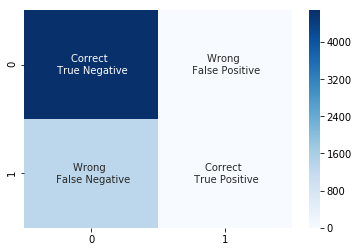

In [10]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(ytest, y_pred_test)
print('Confussion Matrix from the test data')
print(cf_matrix)

labels = ['Correct \n True Negative','Wrong \n False Positive','Wrong \n False Negative','Correct \n True Positive']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Observations from the confussion matrix above
- A confussion matrix is used to measure the performance of a machine learning classifcation model. Also known as the error matrix brings out the visualization of the performance of a classification model.
- From the visualizations above, there are four different sections with different with statistics about the model performance on this data. 
- From a data set of 30000 entries(records), 20% was to test the model which makes a total of 6000 records. The model perfomance on this data therefore gives statistics of the predictions on the table above which is:  
- **4566 TN(True Negatives):** Records that were  predicted as non defaulted and they actually are
- **117 FP(False Positives):** Non defaulted cards but classified as defaulted
- **1006 FN(False Negatives):** Defaulted cards instead classififed under non defaulted cards. 
- **311 TP(True Positives):** Records that were predicted as defaulted when actually they cards were defaulted.
- TP and FP are assigned to the **Positive class**(Defaulted cards) while TN and FN are assigned to the **negative class**(Non defaulted cards)

In [11]:
# Classification report for Logistic regression with L1 regularization

from sklearn.metrics import classification_report

print("[Training Classification Report:]")
print(classification_report(ytrain, y_pred_train2))

print("[Test Classification Report:]")
print(classification_report(y_pred_test2, ytest))

[Training Classification Report:]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18681
           1       0.71      0.24      0.36      5319

    accuracy                           0.81     24000
   macro avg       0.76      0.61      0.62     24000
weighted avg       0.79      0.81      0.77     24000

[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5572
           1       0.24      0.73      0.36       428

    accuracy                           0.81      6000
   macro avg       0.61      0.77      0.62      6000
weighted avg       0.92      0.81      0.85      6000



### Classification Report
A classification report is used to measure the efficiency of a classification model by printing out on a table howmany predictions are true and howmany are false.
 - **Precision** is the ability of this model not to lable a record positive(defaulted card) whereas it is actually negative(non defaulted card).
 - **Recall** This is the ability of this model to find all positive instances. Positive instances is a sum of True Negative(TN) and False Negative(FN)
 - **F1 score** is the weighted harmonic mean of precision and recall where the best score is 1.0 and the worst is 0. This cannot be compared to model accuracy as it adds up the recall and precision during it's computation. 

[[4449  234]
 [ 860  457]]


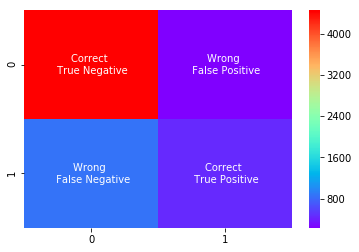

In [14]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(ytest, ypred_dt2)
print(cf_matrix)

labels = ['Correct \n True Negative','Wrong \n False Positive','Wrong \n False Negative','Correct \n True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='rainbow')


In [15]:
# Classification report for Decision tree with hyperparameter tuning

print("[Training Classification Report:]")
print(classification_report(ytrain, ypred_dt))

print("[Test Classification Report:]")
print(classification_report(ypred_dt2, ytest))

[Training Classification Report:]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18681
           1       0.69      0.38      0.49      5319

    accuracy                           0.82     24000
   macro avg       0.77      0.66      0.69     24000
weighted avg       0.81      0.82      0.80     24000

[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5309
           1       0.35      0.66      0.46       691

    accuracy                           0.82      6000
   macro avg       0.65      0.75      0.67      6000
weighted avg       0.88      0.82      0.84      6000



### Observations from classification report of Decision tree with fewer leaves
 - Since precision is the ability of a model not to label a record positive(defaulted) whereas it is actually negative. This therefore means greater precisions reducing the chances of making wrong predictions.
 - From above, the precision values of the decisison tree are higher than those for logistic regression which show how accurate the decisison tree model will perform with any other foreign data.
 - Recall values are also high for this model which is the ability of the model to be able to find all positive instances. Positive instances are sum of True Negative and False Negative values.

In [16]:

log_prediction = clf_lr.predict_proba(Xtest)
# Gives probabilities of the target(0 and 1) in the form of an array. For Logistic regression with regularization

dt_prediction = clf_dt2.predict_proba(Xtest)
# Probabilities of the target for Decision tree

# print out of probability predictions from logistic regression
log_prediction[:5]

array([[0.89252615, 0.10747385],
       [0.61130159, 0.38869841],
       [0.98315197, 0.01684803],
       [0.99068021, 0.00931979],
       [0.67551926, 0.32448074]])

In [17]:
# Converting the numpy array log_prediction(Logistic regression) to a dataframe.
df_log = pd.DataFrame(data=log_prediction, columns=["logPred0", "logPred1"])
df_log.head()

,logPred0,logPred1
0,0.892526,0.107474
1,0.611302,0.388698
2,0.983152,0.016848
3,0.990680,0.009320
4,0.675519,0.324481


In [18]:
df_dt = pd.DataFrame(data=dt_prediction, columns=["dt_Pred0", "dt_Pred1"])
#An inner join is performed to join both dataframes
final = df_log.join(df_dt)

final.head()

,logPred0,logPred1,dt_Pred0,dt_Pred1
0,0.892526,0.107474,0.904661,0.095339
1,0.611302,0.388698,0.650138,0.349862
2,0.983152,0.016848,0.958716,0.041284
3,0.990680,0.009320,0.958716,0.041284
4,0.675519,0.324481,1.000000,0.000000


Text(0.5,1,'Predicted Prebabilities for class 0 with both models')

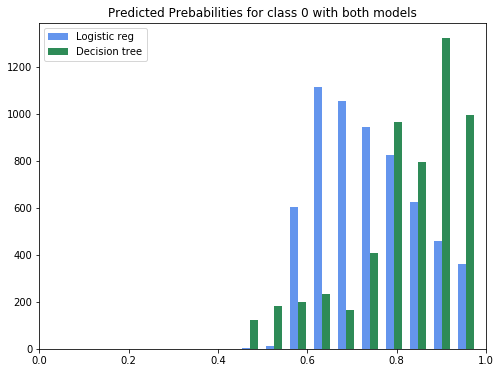

In [20]:
# Bar chart for the predict probabilities on the class 0 for both models.
plt.rcParams["figure.figsize"] = (8,6)
fig, ax = plt.subplots()

log0, a_bins = np.histogram(final['logPred0'])
dt0, b_bins = np.histogram(final['dt_Pred0'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

plt.xlim(0.0, 1.0)
plt.bar(a_bins[:-1], log0, width=width, facecolor='cornflowerblue', label='Logistic reg')
plt.bar(b_bins[:-1]+width, dt0, width=width, facecolor='seagreen', label='Decision tree')
plt.legend(loc="upper left")
plt.title('Predicted Prebabilities for class 0 with both models')

### Observations from probability predictions from both models considering the 0 class
 - The bar chart above shows probability predictions performed on both Logistic Regression and Decision tree model. 
 - This visualization is only for the class 0 which is credit card accounts that were not defaulted.
 - This shows that the model with highest and best prediction probabilities is the Decision tree model.
 - This visualization also helps visualize the rate at which the model misclassifices during predictions which is looking at the amount of counts for probabilities lower then 0.5